In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split


newsCorpora = pd.read_table('newsCorpora.csv', header=None)
newsCorpora.columns = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
newsCorpora = newsCorpora[newsCorpora['PUBLISHER'].isin(
    ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'])].sample(frac=1, random_state=0)

X = newsCorpora[['TITLE', 'CATEGORY']].copy()
X['CATEGORY'] = X['CATEGORY'].map({'b': 0, 'e': 1, 't': 2, 'm': 3})
y = newsCorpora['CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=0)

X_train.to_csv('ch06/train2.txt', sep='\t', index=False, header=None)
X_valid.to_csv('ch06/valid2.txt', sep='\t', index=False, header=None)
X_test.to_csv('ch06/test2.txt', sep='\t', index=False, header=None)

In [8]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


X_train = pd.read_table('ch06/train2.txt', header=None)
X_valid = pd.read_table('ch06/valid2.txt', header=None)
X_test = pd.read_table('ch06/test2.txt', header=None)
use_cols = ['TITLE', 'CATEGORY']
X_train.columns = use_cols
X_valid.columns = use_cols
X_test.columns = use_cols
X_train['TMP'] = 'train'
X_valid['TMP'] = 'valid'
X_test['TMP'] = 'test'

data = pd.concat([X_train, X_valid, X_test]).reset_index(drop=True)
vectorizer = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b')
bag = vectorizer.fit_transform(data['TITLE'])
data = pd.concat([data, pd.DataFrame(bag.toarray())], axis=1)

joblib.dump(vectorizer.vocabulary_, 'ch06/vocabulary_.joblib')

X_train = data.query('TMP=="train"').drop(use_cols + ['TMP'], axis=1)
X_valid = data.query('TMP=="valid"').drop(use_cols + ['TMP'], axis=1)
X_test = data.query('TMP=="test"').drop(use_cols + ['TMP'], axis=1)

X_train.to_csv('ch06/train.feature.txt', sep='\t', index=False, header=None)
X_valid.to_csv('ch06/valid.feature.txt', sep='\t', index=False, header=None)
X_test.to_csv('ch06/test.feature.txt', sep='\t', index=False, header=None)

In [10]:
df = pd.read_csv('newsCorpora.csv', sep='\t')
print(df.head())

   1 Fed official says weak data caused by weather, should not slow taper  \
0  2  Fed's Charles Plosser sees high bar for change...                     
1  3  US open: Stocks fall after Fed official hints ...                     
2  4  Fed risks falling 'behind the curve', Charles ...                     
3  5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...                     
4  6  Plosser: Fed May Have to Accelerate Tapering Pace                     

  http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss  \
0  http://www.livemint.com/Politics/H2EvwJSK2VE6O...                                                                            
1  http://www.ifamagazine.com/news/us-open-stocks...                                                                            
2  http://www.ifamagazine.com/news/fed-risks-fall...                                                                            
3  http://www.moneyne

In [13]:
index = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']
df = pd.read_csv('newsCorpora.csv', sep='\t', names=index)
print(df.head())

   id                                              title  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 url          publisher  \
0  http://www.latimes.com/business/money/la-fi-mo...  Los Angeles Times   
1  http://www.livemint.com/Politics/H2EvwJSK2VE6O...           Livemint   
2  http://www.ifamagazine.com/news/us-open-stocks...       IFA Magazine   
3  http://www.ifamagazine.com/news/fed-risks-fall...       IFA Magazine   
4  http://www.moneynews.com/Economy/federal-reser...          Moneynews   

  category                          story             hostname      timestamp  
0        b  ddUyU0VZz0BRneMioxUPQVP6sIxvM      www.latimes.com  1394470370698  
1        b  ddUyU0VZz0BRneMi

In [14]:
publisher_opt = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Dail Mail']
index = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']
df = pd.read_csv('newsCorpora.csv', sep='\t', names=index)
#pandasの条件抽出、.isin
df = df[df['publisher'].isin(publisher_opt)]
print(df.head())

    id                                              title  \
12  13       Europe reaches crunch point on banking union   
13  14  ECB FOCUS-Stronger euro drowns out ECB's messa...   
19  20  Euro Anxieties Wane as Bunds Top Treasuries, S...   
20  21  Noyer Says Strong Euro Creates Unwarranted Eco...   
29  30  REFILE-Bad loan triggers key feature in ECB ba...   

                                                  url     publisher category  \
12  http://in.reuters.com/article/2014/03/10/eu-ba...       Reuters        b   
13  http://in.reuters.com/article/2014/03/10/ecb-p...       Reuters        b   
19  http://www.businessweek.com/news/2014-03-10/ge...  Businessweek        b   
20  http://www.businessweek.com/news/2014-03-10/no...  Businessweek        b   
29  http://in.reuters.com/article/2014/03/10/euroz...       Reuters        b   

                            story              hostname      timestamp  
12  dPhGU51DcrolUIMxbRm0InaHGA2XM        in.reuters.com  1394470501755  
13  dP

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd

publisher_opt = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Dail Mail']
index = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']
df = pd.read_csv('newsCorpora.csv', sep='\t', names=index)
#pandasの条件抽出、.isin
df = df[df['publisher'].isin(publisher_opt)]
#test_sizeでテスト用の割合を指定できる
#random_stateで乱数シードを指定
#x_trainがtitleで、y_trainがcategory
x_train, x_test, y_train, y_test = train_test_split(df['title'], df['category'], test_size=0.2, random_state=1)
print(x_train.head())
print(y_train.head())

142629    China Hunts Down 'Zombies' to Fix Failed Auto ...
338912    Hormel to Acquire Muscle Milk Maker for $450 M...
188392    Insurers Say Most Obamacare Customers Paid Fir...
101122         FOREX-Dollar inches higher on equities gloom
4471      UPDATE 2-Italy's UniCredit posts record $19 bl...
Name: title, dtype: object
142629    b
338912    b
188392    b
101122    b
4471      b
Name: category, dtype: object


In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd

publisher_opt = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Dail Mail']
index = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']
df = pd.read_csv('newsCorpora.csv', sep='\t', names=index)
#pandasの条件抽出、.isin
df = df[df['publisher'].isin(publisher_opt)]
#test_sizeでテスト用の割合を指定できる
#random_stateで乱数シードを指定
#x_trainがtitleで、y_trainがcategory
x_train, x_test, y_train, y_test = train_test_split(df['title'], df['category'], test_size=0.2, random_state=1)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1)
print(x_valid.head())
print(y_valid.head())


47057     Ukraine Bonds Rally 10th Day as IMF Talks Soot...
393266    Orange's network investments help ward off low...
326611    Hong Kong Vote Annoying Beijing Risks Curbing ...
160618           Wake Up, Internet -- Time to Save Yourself
205321    With $51 Million, Seth Rogen's 'Neighbors' Sma...
Name: title, dtype: object
47057     b
393266    b
326611    b
160618    t
205321    e
Name: category, dtype: object


In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd

publisher_opt = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Dail Mail']
index = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']
df = pd.read_csv('newsCorpora.csv', sep='\t', names=index)
#pandasの条件抽出、.isin
df = df[df['publisher'].isin(publisher_opt)]
#test_sizeでテスト用の割合を指定できる
#random_stateで乱数シードを指定
#x_trainがtitleで、y_trainがcategory
x_train, x_test, y_train, y_test = train_test_split(df['title'], df['category'], test_size=0.2, random_state=1)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

#pd.concatで、データを連結させる
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
valid = pd.concat([x_valid, y_valid], axis=1)
print(train.head)


                                                    title category
142629  China Hunts Down 'Zombies' to Fix Failed Auto ...        b
338912  Hormel to Acquire Muscle Milk Maker for $450 M...        b
188392  Insurers Say Most Obamacare Customers Paid Fir...        b
101122       FOREX-Dollar inches higher on equities gloom        b
4471    UPDATE 2-Italy's UniCredit posts record $19 bl...        b


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

publisher_opt = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Dail Mail']
index = ['id', 'title', 'url', 'publisher', 'category', 'story', 'hostname', 'timestamp']
df = pd.read_csv('newsCorpora.csv', sep='\t', names=index)
#pandasの条件抽出、.isin
df = df[df['publisher'].isin(publisher_opt)]
#test_sizeでテスト用の割合を指定できる
#random_stateで乱数シードを指定
#x_trainがtitleで、y_trainがcategory
x_train, x_test, y_train, y_test = train_test_split(df['title'], df['category'], test_size=0.2, random_state=1)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

#pd.concatで、データを連結させる
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
valid = pd.concat([x_valid, y_valid], axis=1)

train.to_csv('ch06/train.txt', sep='\t')
test.to_csv('ch06/test.txt', sep='\t')
valid.to_csv('ch06/valid.txt', sep='\t')

In [4]:
print('------------train------------')
print('business               :', (train['category'] == 'b').sum())
print('science and technology :', (train['category'] == 't').sum())
print('entertainment          :', (train['category'] == 'e').sum())
print('health                 :', (train['category'] == 'm').sum())
print('------------test------------')
print('business               :', (test['category'] == 'b').sum())
print('science and technology :', (test['category'] == 't').sum())
print('entertainment          :', (test['category'] == 'e').sum())
print('health                 :', (test['category'] == 'm').sum())
print('------------valid------------')
print('business               :', (valid['category'] == 'b').sum())
print('science and technology :', (valid['category'] == 't').sum())
print('entertainment          :', (valid['category'] == 'e').sum())
print('health                 :', (valid['category'] == 'm').sum())

------------train------------
business               : 4343
science and technology : 979
entertainment          : 3028
health                 : 518
------------test------------
business               : 547
science and technology : 106
entertainment          : 379
health                 : 77
------------valid------------
business               : 533
science and technology : 121
entertainment          : 398
health                 : 57


In [5]:
#index_colで使いたい列の列番号を０始まりで指定する、０なら元々のまま、１なら、元々２列目にくるものが一番左に出てくる
train = pd.read_csv('ch06/train.txt', sep='\t', index_col=0)
test = pd.read_csv('ch06/test.txt', sep='\t', index_col=0)
valid = pd.read_csv('ch06//valid.txt', sep='\t', index_col=0)

print(train.head())

                                                    title category
142629  China Hunts Down 'Zombies' to Fix Failed Auto ...        b
338912  Hormel to Acquire Muscle Milk Maker for $450 M...        b
188392  Insurers Say Most Obamacare Customers Paid Fir...        b
101122       FOREX-Dollar inches higher on equities gloom        b
4471    UPDATE 2-Italy's UniCredit posts record $19 bl...        b


In [6]:
train = pd.read_csv('ch06/train.txt', sep='\t', index_col=1)
test = pd.read_csv('ch06/test.txt', sep='\t', index_col=0)
valid = pd.read_csv('ch06/valid.txt', sep='\t', index_col=0)

print(train.head())

                                                    Unnamed: 0 category
title                                                                  
China Hunts Down 'Zombies' to Fix Failed Auto P...      142629        b
Hormel to Acquire Muscle Milk Maker for $450 Mi...      338912        b
Insurers Say Most Obamacare Customers Paid Firs...      188392        b
FOREX-Dollar inches higher on equities gloom            101122        b
UPDATE 2-Italy's UniCredit posts record $19 bln...        4471        b


In [8]:
train = pd.read_csv('ch06/train.txt', sep='\t', index_col=0)
test = pd.read_csv('ch06/test.txt', sep='\t', index_col=0)
valid = pd.read_csv('ch06/valid.txt', sep='\t', index_col=0)


import re
import string

def preprocessing(text: str):
# .translate→＞　複数の文字列内の文字を変換したり削除したいとき、
# ①.maketrans で　.translate()に使える変換テーブルを作成する
# ② .translate()で文字列内の文字を変換する
  table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  text = text.translate(table)
  text = text.lower()
  text = re.sub(r'[0-9]+', '0', text)
  return text

train['title'] = train['title'].map(lambda x: preprocessing(x))
test['title'] = test['title'].map(lambda x: preprocessing(x))
valid['title'] = valid['title'].map(lambda x: preprocessing(x))

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x = vectorizer.fit_transform(train['title'])
test_x = vectorizer.transform(test['title'])
valid_x = vectorizer.transform(valid['title'])

train_x = pd.DataFrame(train_x.toarray(), columns=vectorizer.get_feature_names_out())
test_x = pd.DataFrame(test_x.toarray(), columns=vectorizer.get_feature_names_out())
valid_x = pd.DataFrame(valid_x.toarray(), columns=vectorizer.get_feature_names_out())
train_x.head()

,0b,0bn,0c,0ct,0d,0f,0ff,0g,0headlines,0k,...,zoe,zombie,zombies,zone,zoosk,zpfa0mqti0qdrpfhqwjm,zynga,œf,œpiece,œwaist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.446746,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

# データの分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


In [3]:
import string
import re

def preprocessing(text):
# .translate→＞　複数の文字列内の文字を変換したり削除したいとき、
# ①.maketrans で　.translate()に使える変換テーブルを作成する
# ② .translate()で文字列内の文字を変換する
#http://www.w3big.com/ja/python3/python3-string-maketrans.html#gsc.tab=0
#sentenceだけを純粋に見たいから、余計な特徴量を消す
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  text = text.translate(table)  # 記号をスペースに置換
  text = text.lower()  # 小文字化
  text = re.sub('[0-9]+', '0', text)  # 数字列を0に置換

  return text
# データの再結合
#print(df.head())
df = pd.concat([train, valid, test], axis=0)
#print(df.head())
df.reset_index(drop=True, inplace=True)  # indexを振りなおす


# 前処理の実施
df['TITLE'] = df['TITLE'].map(lambda x: preprocessing(x))

#print(df.head())

from sklearn.feature_extraction.text import TfidfVectorizer

# データの分割
train_valid = df[:len(train) + len(valid)]
#print(train_valid.head())
# testのみ
test = df[len(train) + len(valid):]
#print(test.head())
# TfidfVectorizer term freequency inverse document frequency 
#min_dif 使用されている文章数が10以下の場合の単語は排除する
#特徴量として加えるngramの範囲を(下限, 上限)で指定できる。。（１,2)なら，各単語に加えてbi-gramも考慮されることになります
vec_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2))  # ngram_rangeでTF-IDFを計算する単語の長さを指定


# ベクトル化
X_train_valid = vec_tfidf.fit_transform(train_valid['TITLE'])  # testの情報は使わない
X_test = vec_tfidf.transform(test['TITLE'])
#print(X_train_valid)
#print(X_test)

# ベクトルをデータフレームに変換,DataFrameはvalues, columns, indexの３つを持つ
X_train_valid = pd.DataFrame(X_train_valid.toarray(), columns=vec_tfidf.get_feature_names_out())
X_test = pd.DataFrame(X_test.toarray(), columns=vec_tfidf.get_feature_names_out())
#print(X_train_valid)
# データの分割
X_train = X_train_valid[:len(train)]
X_valid = X_train_valid[len(train):]

# データの保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)

#print(X_train.head())

In [4]:
from sklearn.linear_model import LogisticRegression
#print(X_train)
#print(train['CATEGORY'])
# モデルの学習
lg = LogisticRegression(random_state=123, max_iter=10000) #ロジスティック回帰モデルのインスタンスを作成
lg.fit(X_train, train['CATEGORY']) #ロジスティックモデルの重みを学習

LogisticRegression(max_iter=10000, random_state=123)

In [5]:
import numpy as np

def score_lg(lg, X):
  return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]

#predict	予測する、所属しているクラスが返ってくる
#predict_proba	所属しているクラスの確率が戻ってくる
#データの見方、bの確率は0.9394,,,,,,,

train_pred = score_lg(lg, X_train)
test_pred = score_lg(lg, X_test)
#print(X_train)
print(train_pred)



[array([0.93943023, 0.98281993, 0.61624726, ..., 0.98332608, 0.80166171,
       0.77274281]), array(['b', 'b', 'b', ..., 'b', 'e', 'e'], dtype=object)]


In [8]:
from sklearn.metrics import accuracy_score
#accuracy_score(テストデータの正解ラベル, 推論したいデータのクラスラベル)
train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1])
test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1])

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.923
正解率（評価データ）：0.886


[[4347   95    7   53]
 [  66 4146    3    8]
 [ 102  134  482   10]
 [ 188  145    8  878]]


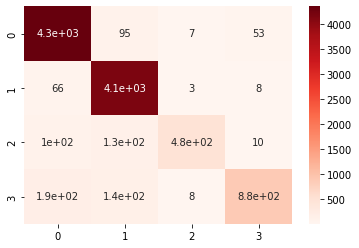

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion_matrix(テストデータの正解ラベル, 推論したいデータのクラスラベル)
train_cm = confusion_matrix(train['CATEGORY'], train_pred[1])
print(train_cm)
#sns.heatmap(データ、セルに値を出力する、カラーマップの色を指定する)
sns.heatmap(train_cm, annot=True, cmap='Reds')
plt.show()

[[533  20   2   8]
 [ 12 513   1   2]
 [ 13  34  39   5]
 [ 28  26   1  97]]


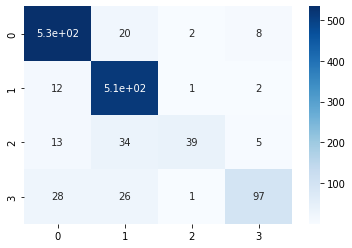

In [57]:
# 評価データ
test_cm = confusion_matrix(test['CATEGORY'], test_pred[1])
print(test_cm)
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
#precision, recall, f1スコア、andrewでやったよおおおおおおおおお
def calculate_scores(y_true, y_pred):
  # 適合率、正予測の正答率
  precision = precision_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])  # Noneを指定するとクラスごとの精度をndarrayで返す
  precision = np.append(precision, precision_score(y_true, y_pred, average='micro'))  # 末尾にマイクロ平均を追加
  precision = np.append(precision, precision_score(y_true, y_pred, average='macro'))  # 末尾にマクロ平均を追加

  # 再現率、正に対する正答率
  recall = recall_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
  recall = np.append(recall, recall_score(y_true, y_pred, average='micro'))
  recall = np.append(recall, recall_score(y_true, y_pred, average='macro'))

  # F1スコア、適合率と再現率の調和平均
  f1 = f1_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
  f1 = np.append(f1, f1_score(y_true, y_pred, average='micro'))
  f1 = np.append(f1, f1_score(y_true, y_pred, average='macro'))

  # 結果を結合してデータフレーム化
  #valueとcolumnが辞書型として入っている
  scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1},
                      index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])
  return scores

print(calculate_scores(test['CATEGORY'], test_pred[1]))

             適合率       再現率     F1スコア
b       0.909556  0.946714  0.927763
e       0.865093  0.971591  0.915254
t       0.866071  0.638158  0.734848
m       0.906977  0.428571  0.582090
マイクロ平均  0.886057  0.886057  0.886057
マクロ平均   0.886924  0.746259  0.789989


In [119]:
#X_trainのcolumnsのところをvaluesとしてとってくる
features = X_train.columns.values
#print(X_train)
#print(features)
index = [i for i in range(1, 11)]
#zip関数　要素をまとめる
#print(lg.classes_) ラベル名
#print(lg.coef_) 回帰係数
for c, coef in zip(lg.classes_, lg.coef_):
  print(f'【カテゴリ】{c}')
  #
  # .TはTranspose
  best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=['重要度上位'], index=index).T
  worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
  #axis=0だと、データが下にconcatされる
  display(pd.concat([best10, worst10], axis=0))
  print('\n')

['b' 'e' 'm' 't']
[[-0.69078405 -0.02986314  0.26500599 ... -0.57074615 -0.39331915
   0.46384802]
 [-0.27338127  0.48867546 -0.24032161 ...  1.10403171  0.70903832
  -0.47935622]
 [ 0.39878725 -0.10100778 -0.07620884 ... -0.25629883 -0.13860725
   0.06262638]
 [ 0.56537807 -0.35780454  0.05152445 ... -0.27698673 -0.17711193
  -0.04711818]]
【カテゴリ】b


,1,2,3,4,5,6,7,8,9,10
重要度上位,bank,fed,china,ecb,stocks,ukraine,obamacare,euro,oil,yellen
重要度下位,her,video,ebola,the,and,she,aereo,study,google,virus




【カテゴリ】e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,chris,star,movie,he,her,she,film,jay,paul
重要度下位,us,update,google,study,gm,china,facebook,billion,ceo,could




【カテゴリ】m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,study,drug,fda,cancer,mers,could,cases,health,cigarettes
重要度下位,facebook,gm,apple,bank,google,ceo,deal,climate,twitter,sales




【カテゴリ】t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,facebook,apple,microsoft,climate,gm,tesla,nasa,earth,heartbleed
重要度下位,stocks,fed,her,percent,drug,american,cancer,shares,still,ukraine


In [65]:
from tqdm import tqdm
#tqdm 進捗状況や処理状況をプログレスバーとして表示する機能

result = []
# np.logspace 対数スケール配列
#　10^(-5) ~ 10 ^4までを値に持つ配列を10こ生成
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
  
  # モデルの学習 .fit(学習用のデータ,　正解ラベル)
  lg = LogisticRegression(random_state=123, max_iter=10000, C=C)
  lg.fit(X_train, train['CATEGORY'])

  # 予測値の取得, score_lgは自分でdefineした
  train_pred = score_lg(lg, X_train)
  valid_pred = score_lg(lg, X_valid)
  test_pred = score_lg(lg, X_test)

  # 正解率の算出, accuracy_score(正解サンプル, 予測サンプル)
  train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1])
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])
  test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1])

  # 結果の格納
  result.append([C, train_accuracy, valid_accuracy, test_accuracy])

100%|██████████| 10/10 [02:38<00:00, 15.86s/it]


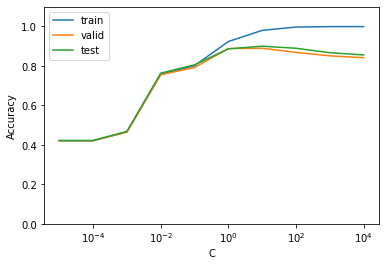

In [66]:
# 視覚化
result = np.array(result).T
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale ('log')
plt.xlabel('C')
plt.legend()
plt.show()

In [ ]:
import optuna

# 最適化対象を関数で指定
def objective_lg(trial):
  # チューニング対象パラメータのセット
  l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
  C = trial.suggest_loguniform('C', 1e-4, 1e4)

  # モデルの学習
  lg = LogisticRegression(random_state=123, 
                          max_iter=10000, 
                          penalty='elasticnet', 
                          solver='saga', 
                          l1_ratio=l1_ratio, 
                          C=C)
  lg.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  valid_pred = score_lg(lg, X_valid)

  # 正解率の算出
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])    

  return valid_accuracy 

  # 最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective_lg, timeout=3600)

# 結果の表示
print('Best trial:')
trial = study.best_trial
print('  Value: {:.3f}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
  print('    {}: {}'.format(key, value))


In [ ]:
# パラメータの設定
l1_ratio = trial.params['l1_ratio']
C = trial.params['C']

# モデルの学習
lg = LogisticRegression(random_state=123, 
                        max_iter=10000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio, 
                        C=C)
lg.fit(X_train, train['CATEGORY'])

# 予測値の取得
train_pred = score_lg(lg, X_train)
valid_pred = score_lg(lg, X_valid)
test_pred = score_lg(lg, X_test)

# 正解率の算出
train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1]) 
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1]) 
test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1]) 

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')